In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import warnings
from tqdm import tqdm
from sklearn.preprocessing import MinMaxScaler
import time
from datetime import datetime
warnings.filterwarnings(action='ignore')   #워닝 무시. 원상복구는 default

%matplotlib inline

In [2]:
ew_0 = pd.read_csv('C:/Users/twentystones/Desktop/1프로젝트/데이터 모음집/ew_0_list_final.csv', encoding='utf-8-sig')
ew_0[['style_boy', 'style_romantic', 'style_cartoon', 'style_realitic',
       'style_graphicnoble', 'style_etc']]

,style_boy,style_romantic,style_cartoon,style_realitic,style_graphicnoble,style_etc
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,1,0,0,0,0
3,0,0,0,0,1,0
4,0,0,1,0,0,0
...,...,...,...,...,...,...
214,0,0,1,0,0,0
215,0,0,0,0,1,0
216,1,0,0,0,0,0
217,0,0,1,0,0,0


In [3]:
ew_1 = pd.read_csv('C:/Users/twentystones/Desktop/1프로젝트/데이터 모음집/ew_1_episode.csv')

#like_tot 정수형으로
ew_1['like_tot'] = ew_1['like_tot'].str.strip('like')
ew_1['like_tot'] = ew_1['like_tot'].str.replace(',', '').astype('int64')

#일부만 저장
ew_1 = ew_1[['title_a', 'ep_title_a','date_a', 'like_tot','rep_num']]

#구독자수 넣기
subscribe_list=[]
for i in tqdm(range(0,len(ew_1))):
    subscribe_list.append(int(ew_0[ew_0['title'] == ew_1['title_a'][i]]['subscribe']))
ew_1['subscribe']=subscribe_list
ew_1

#장르 넣기
genre_list=[]
for i in tqdm(range(0,len(ew_1))):
    genre_list.append(ew_0[ew_0['title'] == ew_1['title_a'][i]]['genre'].values[0])
ew_1['genre']=genre_list
ew_1

100%|██████████████████████████████████████████████████████████████████████████| 24981/24981 [00:11<00:00, 2178.14it/s]


,title_a,ep_title_a,date_a,like_tot,rep_num,subscribe,genre
0,SubZero,(S2) Episode 97,01-Aug-21,62476,1007,0,Romance
1,SubZero,(S2) Episode 96,25-Jul-21,79618,2194,0,Romance
2,SubZero,(S2) Episode 95,18-Jul-21,85158,1031,0,Romance
3,SubZero,(S2) Episode 94,11-Jul-21,92853,1501,0,Romance
4,SubZero,(S2) Episode 93,04-Jul-21,102290,1664,0,Romance
...,...,...,...,...,...,...,...
24976,IF,Episode 5,22-Mar-20,13205,570,0,Action
24977,IF,Episode 4,15-Mar-20,14372,734,0,Action
24978,IF,Episode 3,08-Mar-20,19363,1307,0,Action
24979,IF,Episode 2,08-Mar-20,20044,985,0,Action


In [4]:
#스케일링
ew_0_numeric = ew_1[['like_tot','rep_num','subscribe']]

min_max_scaler = MinMaxScaler()
fitted = min_max_scaler.fit(ew_0_numeric)
print(fitted.data_max_)
ew_0_scale = min_max_scaler.transform(ew_0_numeric)
ew_0_scale = pd.DataFrame(ew_0_scale, columns=ew_0_numeric.columns)
print(ew_0_scale)

for i in ew_0_scale.columns:
    ew_1[i] = ew_0_scale[i]
ew_1

[4.32479e+05 2.34495e+05 1.00000e+00]
       like_tot   rep_num  subscribe
0      0.143862  0.004252        0.0
1      0.183527  0.009314        0.0
2      0.196345  0.004354        0.0
3      0.214151  0.006359        0.0
4      0.235987  0.007054        0.0
...         ...       ...        ...
24976  0.029856  0.002388        0.0
24977  0.032556  0.003088        0.0
24978  0.044105  0.005531        0.0
24979  0.045680  0.004158        0.0
24980  0.054096  0.004879        0.0

[24981 rows x 3 columns]


,title_a,ep_title_a,date_a,like_tot,rep_num,subscribe,genre
0,SubZero,(S2) Episode 97,01-Aug-21,0.143862,0.004252,0.0,Romance
1,SubZero,(S2) Episode 96,25-Jul-21,0.183527,0.009314,0.0,Romance
2,SubZero,(S2) Episode 95,18-Jul-21,0.196345,0.004354,0.0,Romance
3,SubZero,(S2) Episode 94,11-Jul-21,0.214151,0.006359,0.0,Romance
4,SubZero,(S2) Episode 93,04-Jul-21,0.235987,0.007054,0.0,Romance
...,...,...,...,...,...,...,...
24976,IF,Episode 5,22-Mar-20,0.029856,0.002388,0.0,Action
24977,IF,Episode 4,15-Mar-20,0.032556,0.003088,0.0,Action
24978,IF,Episode 3,08-Mar-20,0.044105,0.005531,0.0,Action
24979,IF,Episode 2,08-Mar-20,0.045680,0.004158,0.0,Action


# 영어www지수 추이

In [6]:
title_list, ep_list, www_list, genre_list = [],[],[],[]

for v,i in tqdm(enumerate(ew_0['title'])):
    ew = ew_1[ew_1['title_a']==i] #한 웹툰만 ew로 저장
    k=int(ew_0['num_of_ep'][v])  #한 웹툰의 에피소드 갯수.
    subscribe = float(ew_1[ew_1['title_a']==i]['subscribe'][0:1]) #한 웹툰의 구독자 갯수
    ep = ew_1[ew_1['title_a'] == i]['ep_title_a'].values #한 웹툰의 에피소드 목록 
    genre = float(ew_1[ew_1['title_a']==i]['subscribe'][0:1])
    
    a=0
    for j in range(0, k-4):
        title_list.append(i)   #타이틀
        ep_list.append(ep[a])      #에피소드
        genre_list.append(genre)
        
        like4 = ew['like_tot'][a:a+4].mean() #4주 좋아요 평균
        rep4 = ew['rep_num'][a:a+4].mean()   #4주 댓글수 평균
        www_list.append(format(like4+rep4+subscribe, '.5f'))  #4주 좋아요평균과 4주 댓글수평균과 구독자 수 합
        a+=1
    


grape = pd.DataFrame({'title':title_list,
                      'ep' : ep_list,
                      'www':www_list                     
                     })
grape

219it [00:06, 32.89it/s]


,title,ep,www
0,SubZero,(S2) Episode 97,0.19054
1,SubZero,(S2) Episode 96,0.21427
2,SubZero,(S2) Episode 95,0.23878
3,SubZero,(S2) Episode 94,0.26579
4,SubZero,(S2) Episode 93,0.32856
...,...,...,...
24100,IF,Episode 9,0.02826
24101,IF,Episode 8,0.02974
24102,IF,Episode 7,0.03189
24103,IF,Episode 6,0.03679


100%|████████████████████████████████████████████████████████████████████████████████| 219/219 [00:04<00:00, 46.68it/s]


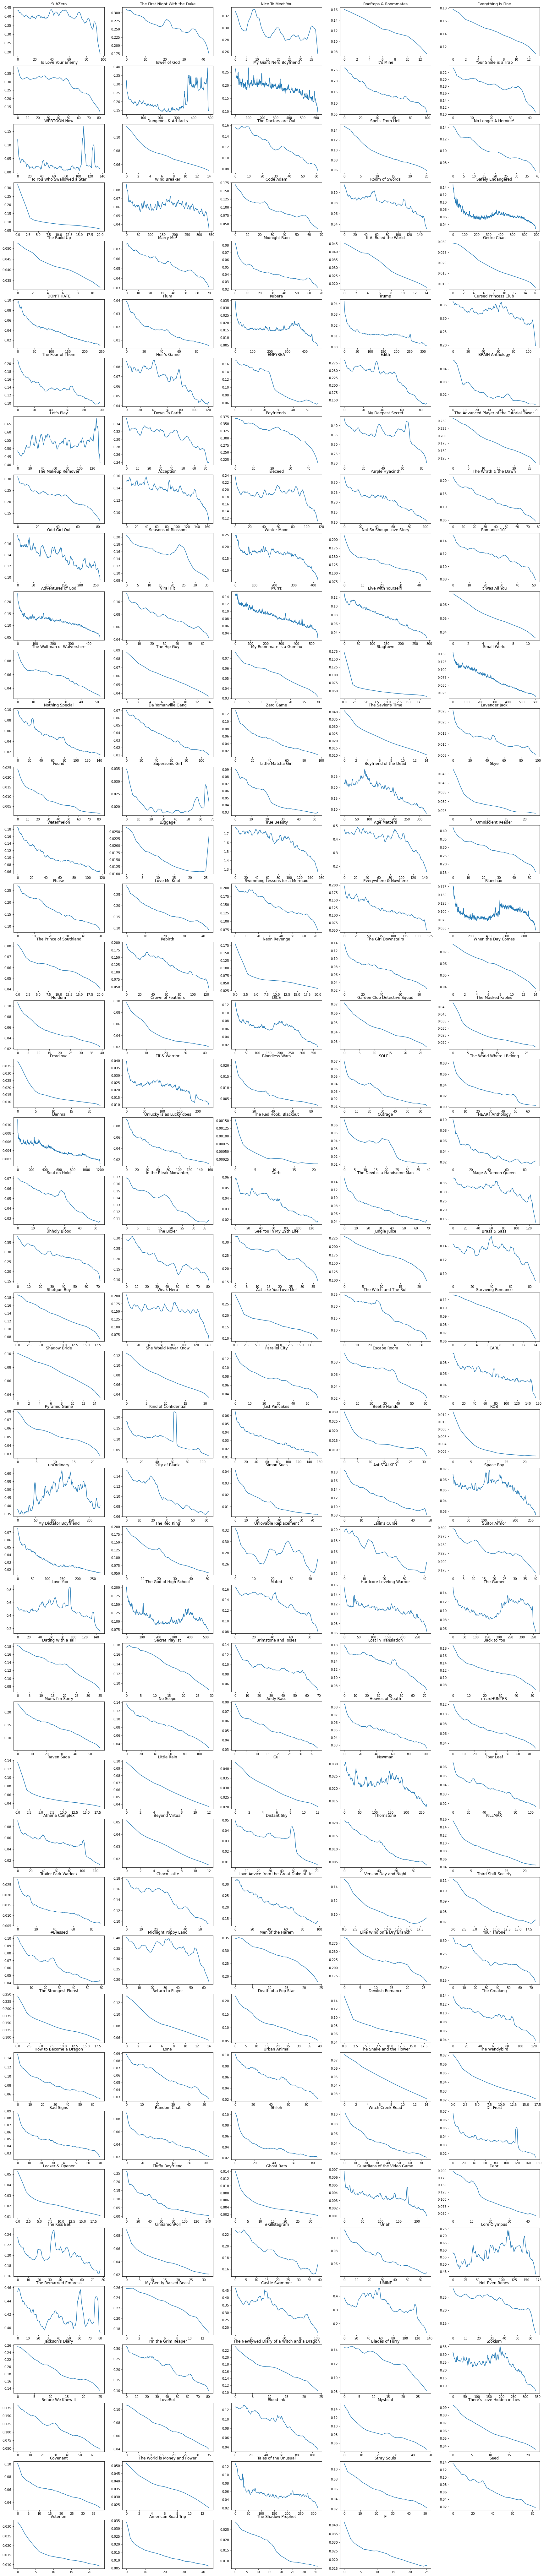

In [7]:
title_list = ew_0['title'].tolist()     #만화목록을 리스트화

grape['www'] = pd.to_numeric(grape['www'])   #www가 문자형이길래 숫자로 바꿔줌


plt.figure(figsize=(30,150))
warnings.filterwarnings(action='ignore')   #워닝 무시. 원상복구는 default

n=1
for i in tqdm(title_list):
    like_wave = grape[grape['title']==i  ]['www']
    ax = plt.subplot(44,5,n)
    plt.plot(range(0,len(like_wave.values)), like_wave.values[::-1] )
    plt.title(i)
    n+=1
plt.show()


# 영어 장르별www추이

In [13]:
ew_1['date_a'][0]

Timestamp('2021-08-01 00:00:00')

In [16]:
#에피소드별 www지수 만들기
www_list=[]
like = ew_1['like_tot']
rep_num =  ew_1['rep_num']
subscribe = ew_1['subscribe']

for i in range(0,len(ew_1)):
    www_list.append((like[i]+rep_num[i]+subscribe[i])/3)
ew_1['www']=www_list
ew_1

,title_a,ep_title_a,date_a,like_tot,rep_num,subscribe,genre,www
0,SubZero,(S2) Episode 97,2021-08-01,0.143862,0.004252,0.0,Romance,0.049371
1,SubZero,(S2) Episode 96,2021-07-01,0.183527,0.009314,0.0,Romance,0.064280
2,SubZero,(S2) Episode 95,2021-07-01,0.196345,0.004354,0.0,Romance,0.066900
3,SubZero,(S2) Episode 94,2021-07-01,0.214151,0.006359,0.0,Romance,0.073503
4,SubZero,(S2) Episode 93,2021-07-01,0.235987,0.007054,0.0,Romance,0.081013
...,...,...,...,...,...,...,...,...
24976,IF,Episode 5,2020-03-01,0.029856,0.002388,0.0,Action,0.010748
24977,IF,Episode 4,2020-03-01,0.032556,0.003088,0.0,Action,0.011881
24978,IF,Episode 3,2020-03-01,0.044105,0.005531,0.0,Action,0.016545
24979,IF,Episode 2,2020-03-01,0.045680,0.004158,0.0,Action,0.016613


In [17]:
genre_grape = ew_1.groupby(['genre','date_a'])[['www']].mean().reset_index()
genre_grape

,genre,date_a,www
0,Action,2014-07-01,0.044290
1,Action,2014-08-01,0.039392
2,Action,2014-09-01,0.037523
3,Action,2014-10-01,0.036472
4,Action,2014-11-01,0.035100
...,...,...,...
901,Thriller,2021-04-01,0.037603
902,Thriller,2021-05-01,0.034088
903,Thriller,2021-06-01,0.031690
904,Thriller,2021-07-01,0.030090


In [18]:
# 최근 월의 장르별 www평균
genre_list = ['Action','Comedy','Drama','Fantasy','Heartwarming','Historical','Horror','Informative','Mystery','Romance'
              ,'Sci-fi','Slice of life','Sports','Superhero','Supernatural','Thriller']

print(genre_grape[genre_grape['genre']=='Action'])
genre_www=[]

for i in genre_list:
    genre_www.append(float(genre_grape[genre_grape['genre']==i]['www'][-1:].values))

ew_Jul_www = pd.DataFrame({'genre':genre_list,
                         'Jul_www':genre_www})
ew_Jul_www.sort_values(by=['Jul_www'], axis=0, ascending=False)   #이중 스릴러 갯수8, 일상툰7, 슈퍼히어로6 스릴러 8 10개미만인거 제외하면 일치

     genre     date_a       www
0   Action 2014-07-01  0.044290
1   Action 2014-08-01  0.039392
2   Action 2014-09-01  0.037523
3   Action 2014-10-01  0.036472
4   Action 2014-11-01  0.035100
..     ...        ...       ...
81  Action 2021-04-01  0.034523
82  Action 2021-05-01  0.028660
83  Action 2021-06-01  0.025690
84  Action 2021-07-01  0.021416
85  Action 2021-08-01  0.016662

[86 rows x 3 columns]


,genre,Jul_www
9,Romance,0.040288
14,Supernatural,0.025103
15,Thriller,0.017803
0,Action,0.016662
3,Fantasy,0.015034
11,Slice of life,0.012578
8,Mystery,0.012155
6,Horror,0.010511
1,Comedy,0.010243
2,Drama,0.010108


100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [00:01<00:00,  8.94it/s]


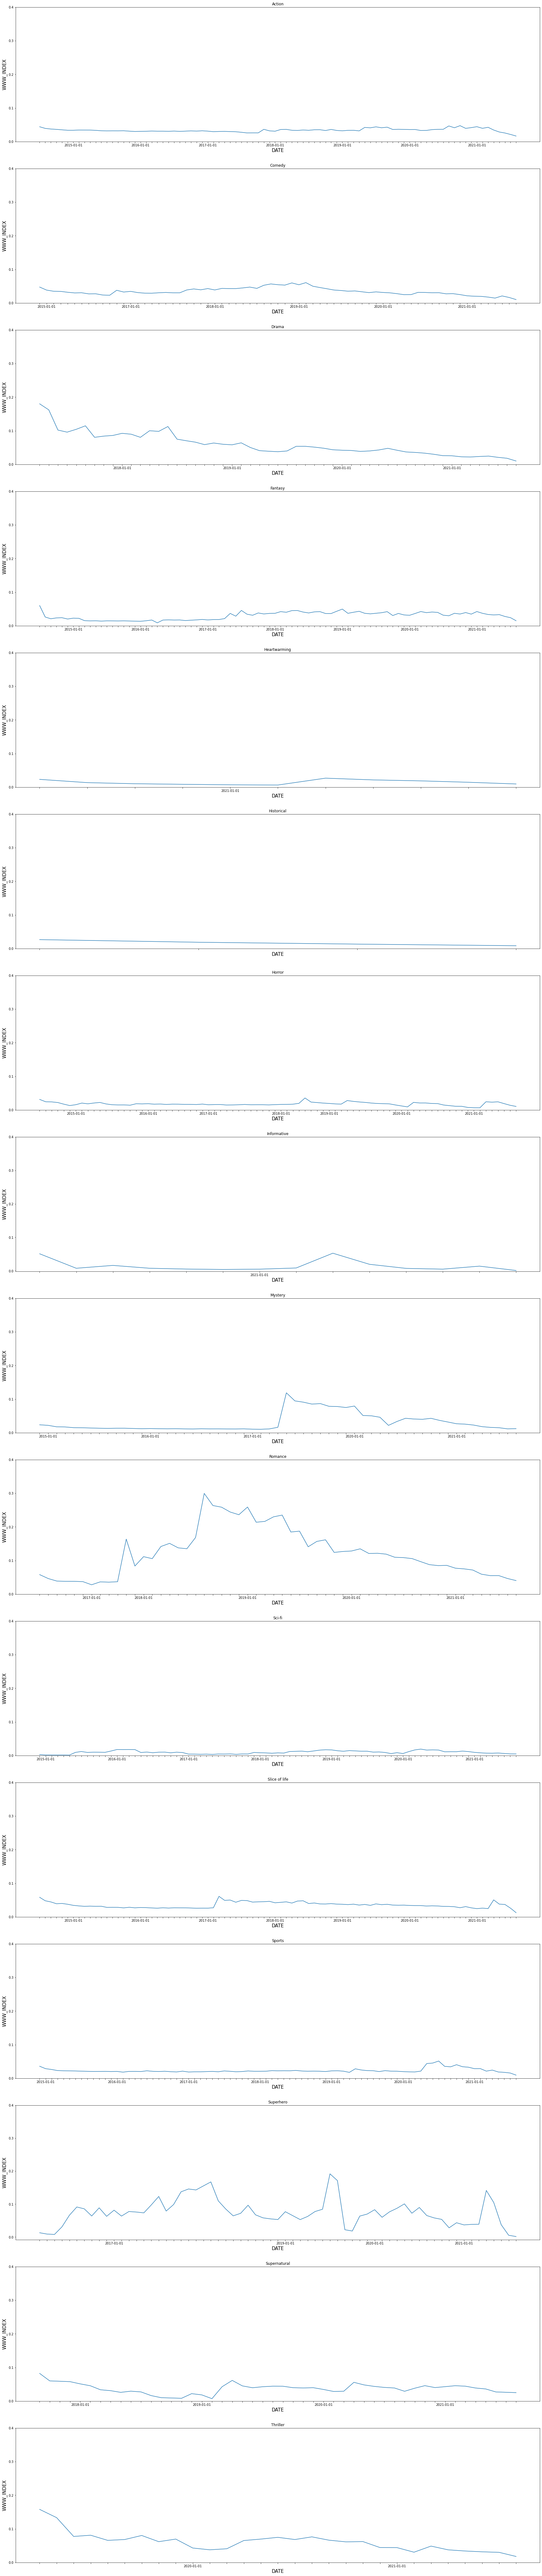

In [19]:
#장르별로 www추이 그래프 생성

#제목 리스트
genre_list = ['Action','Comedy','Drama','Fantasy','Heartwarming','Historical','Horror','Informative','Mystery','Romance'
              ,'Sci-fi','Slice of life','Sports','Superhero','Supernatural','Thriller']

n=1
plt.figure(figsize=(30,150))

for i in tqdm(genre_list):
    
    #날짜리스트
    date_temp = genre_grape[genre_grape['genre'] == i]['date_a']    
    
    #연초만 저장
    date_list2 = []
    for j in range(0,len(date_temp)):
        if str(date_temp.values[j])[0:10] in ['2014-01-01','2015-01-01','2016-01-01','2017-01-01','2018-01-01','2019-01-01','2020-01-01','2021-01-01']:
            date_list2.append(str(date_temp.values[j])[0:10])
        else :
            date_list2.append("")
    date_list2
    
          
    like_wave = genre_grape[genre_grape['genre']==i ]['www']
    ax = plt.subplot(16,1,n)
    plt.plot(range(0,len(like_wave.values)), like_wave.values)
    plt.xticks(np.arange(0,len(date_temp)), labels=date_list2)
    plt.xlabel('DATE', size=15)
    plt.ylabel('WWW_INDEX', size=15)
    plt.yticks(np.arange(0,0.5,0.1))
    plt.title(i)
    n+=1
plt.show()

# 한국

In [20]:
plt.rcParams['font.family'] = 'Malgun Gothic' #한글 안깨지게

In [28]:
kw_0 = pd.read_csv('C:/Users/twentystones/Desktop/1프로젝트/데이터 모음집/kw_0_list.csv', encoding='utf-8-sig')
kw_0['subscribe'] = kw_0['subscribe'].str.replace(',', '').astype('int64')
kw_0

,code,rate,title,author,description,genre_1,genre_2,age,max_ep,subscribe
0,183559,9.93,신의 탑,SIU,자신의 모든 것이었던 소녀를 쫓아 탑에 들어온 소년그리고 그런 소년을 시험하는 탑,스토리,판타지,12세 이용가,499,2030626
1,758037,9.84,참교육,채용택 / 한가람,무너진 교권을 지키기 위해 교권보호국 소속 나화진의 참교육이 시작된다!<부활남> 채...,스토리,액션,15세 이용가,40,567460
2,648419,9.82,뷰티풀 군바리,설이 / 윤성원,'여자도 군대에 간다면?'본격 여자도 군대 가는 만화!,스토리,드라마,15세 이용가,306,735766
3,602910,9.86,윈드브레이커,조용석,혼자서 자전거를 즐겨타던 모범생 조자현.원치 않게 자전거 크루의 일에 자꾸 휘말리게...,스토리,스포츠,12세 이용가,373,1084420
4,733074,9.86,백수세끼,치즈,백수 시절 내 곁을 지켜줬던 그녀... 돌아와 주면 안 되겠니?음식 메뉴마다 담겨 ...,스토리,드라마,전체연령가,86,394747
...,...,...,...,...,...,...,...,...,...,...
326,752462,7.66,데이즈,양수,대한민국 최고 재벌가의 첫째 아들이자 집안의 망나니 ‘한지한’은 오늘도거하게 취했다...,스토리,스릴러,전체연령가,53,23280
327,758665,9.93,샤인 스타,김현,전학생 선유별이 좋아하는 김샤인은 학교에서 유명한 달리기 스타. 잘생긴 얼굴에 뛰어...,스토리,로맨스,전체연령가,32,44463
328,768467,9.73,푸른불꽃,닺,유년시절 트라우마를 겪은 '문가야'. 새롭게 전학 온 학교에서 완벽한 모범생이자 모...,스토리,드라마,15세 이용가,16,18004
329,737021,9.75,마도,이밤,"""그 얼굴, 안 쓸 거면 나줘!""자신의 운명을 모른 채 마법사와 위험한 계약을 한 ...",스토리,판타지,15세 이용가,54,23961


In [39]:
kw_1 = pd.read_csv('C:/Users/twentystones/Desktop/1프로젝트/데이터 모음집/kw_1_episode.csv')
kw_1

,code_a,ep_num_a,ep_title,rate_tot_num,rate_tot_person,date,like_tot,comments_tot
0,183559,1,예고편,9.88,103690,2010.06.30,56904,56624
1,183559,2,1화,9.91,102921,2010.07.05,53195,30140
2,183559,3,2화,9.93,89452,2010.07.12,45604,19228
3,183559,4,3화,9.95,83732,2010.07.19,40544,14393
4,183559,5,4화,9.95,80283,2010.07.26,40438,16628
...,...,...,...,...,...,...,...,...
30323,703852,155,외전 3화,9.65,39579,2021.06.28,36173,4787
30324,703852,156,외전 4화,9.67,38048,2021.07.05,33624,3695
30325,703852,157,외전 5화,9.65,35214,2021.07.12,32632,3715
30326,703852,158,외전 마지막화,9.43,68291,2021.07.19,50515,14840


In [40]:
#일부만 저장
kw_1 = kw_1[['code_a','ep_num_a','rate_tot_person','date','like_tot','comments_tot']]

#구독자수 넣기
subscribe_list=[]
for i in tqdm(range(0,len(kw_1))):
    subscribe_list.append(int(kw_0[kw_0['code'] == kw_1['code_a'][i]]['subscribe']))
kw_1['subscribe']=subscribe_list
kw_1

100%|██████████████████████████████████████████████████████████████████████████| 30328/30328 [00:15<00:00, 1939.72it/s]


,code_a,ep_num_a,rate_tot_person,date,like_tot,comments_tot,subscribe
0,183559,1,103690,2010.06.30,56904,56624,2030626
1,183559,2,102921,2010.07.05,53195,30140,2030626
2,183559,3,89452,2010.07.12,45604,19228,2030626
3,183559,4,83732,2010.07.19,40544,14393,2030626
4,183559,5,80283,2010.07.26,40438,16628,2030626
...,...,...,...,...,...,...,...
30323,703852,155,39579,2021.06.28,36173,4787,1042716
30324,703852,156,38048,2021.07.05,33624,3695,1042716
30325,703852,157,35214,2021.07.12,32632,3715,1042716
30326,703852,158,68291,2021.07.19,50515,14840,1042716


In [41]:
#스케일링
kw_0_numeric = kw_1[['like_tot','comments_tot','subscribe']]

min_max_scaler = MinMaxScaler()
fitted = min_max_scaler.fit(kw_0_numeric)
print(fitted.data_max_)
kw_0_scale = min_max_scaler.transform(kw_0_numeric)
kw_0_scale = pd.DataFrame(kw_0_scale, columns=kw_0_numeric.columns)
print(kw_0_scale)

for i in kw_0_scale.columns:
    kw_1[i] = kw_0_scale[i]
kw_1

[ 100000.  996339. 2493754.]
       like_tot  comments_tot  subscribe
0      0.568457      0.056809   0.813808
1      0.531317      0.030227   0.813808
2      0.455305      0.019275   0.813808
3      0.404636      0.014422   0.813808
4      0.403575      0.016665   0.813808
...         ...           ...        ...
30323  0.360867      0.004781   0.416637
30324  0.335343      0.003685   0.416637
30325  0.325409      0.003705   0.416637
30326  0.504481      0.014871   0.416637
30327  0.463255      0.027627   0.416637

[30328 rows x 3 columns]


,code_a,ep_num_a,rate_tot_person,date,like_tot,comments_tot,subscribe
0,183559,1,103690,2010.06.30,0.568457,0.056809,0.813808
1,183559,2,102921,2010.07.05,0.531317,0.030227,0.813808
2,183559,3,89452,2010.07.12,0.455305,0.019275,0.813808
3,183559,4,83732,2010.07.19,0.404636,0.014422,0.813808
4,183559,5,80283,2010.07.26,0.403575,0.016665,0.813808
...,...,...,...,...,...,...,...
30323,703852,155,39579,2021.06.28,0.360867,0.004781,0.416637
30324,703852,156,38048,2021.07.05,0.335343,0.003685,0.416637
30325,703852,157,35214,2021.07.12,0.325409,0.003705,0.416637
30326,703852,158,68291,2021.07.19,0.504481,0.014871,0.416637


# 한국 웹툰별 www추이

In [32]:
title_list, ep_list, www_list = [],[],[]

for v,i in tqdm(enumerate(kw_0['code'])):
    kw = kw_1[kw_1['code_a']==i] #한 웹툰만 kw로 저장
    k=int(len(kw))  #한 웹툰의 에피소드 갯수.
    subscribe = float(kw_1[kw_1['code_a']==i]['subscribe'][0:1]) #한 웹툰의 구독자 갯수
    ep = kw_1[kw_1['code_a']==i]['ep_num_a'].values #한 웹툰의 에피소드 목록 
    title_temp = str(kw_0[kw_0['code']==i]['title'].values)
    
    a=0
    for j in range(0, k-4):
        title_list.append(title_temp)   #타이틀
        ep_list.append(ep[a])      #에피소드
        
        like4 = kw['like_tot'][a:a+4].mean() #4주 좋아요 평균
        rep4 = kw['comments_tot'][a:a+4].mean()   #4주 댓글수 평균
        www_list.append(format(like4+rep4+subscribe, '.5f'))  #4주 좋아요평균과 4주 댓글수평균과 구독자 수 합
        a+=1
    


grape = pd.DataFrame({'title':title_list,
                      'ep' : ep_list,
                      'www':www_list                     
                     })
grape

331it [00:06, 49.50it/s]


,title,ep,www
0,['신의 탑'],1,1.33392
1,['신의 탑'],2,1.28266
2,['신의 탑'],3,1.23951
3,['신의 탑'],4,1.21587
4,['신의 탑'],5,1.20489
...,...,...,...
28999,['호시탐탐'],26,0.01082
29000,['호시탐탐'],27,0.01074
29001,['호시탐탐'],28,0.01059
29002,['호시탐탐'],29,0.01051


# 한글 장르별 www추이

In [42]:
www_list=[]

like = kw_1['like_tot']
rep_num =  kw_1['comments_tot']
subscribe = kw_1['subscribe']

for i in tqdm(range(0,len(kw_1))):
    www_list.append((like[i]+rep_num[i]+subscribe[i])/3)

kw_1['www']=www_list
kw_1['date'] = kw_1['date'].apply(lambda x:datetime.strptime(x,"%Y.%m.%U"))#날짜형식 바꾸기
kw_1.to_csv('kw_grape_www')
kw_1

100%|████████████████████████████████████████████████████████████████████████| 30328/30328 [00:00<00:00, 100809.74it/s]


,code_a,ep_num_a,rate_tot_person,date,like_tot,comments_tot,subscribe,www
0,183559,1,103690,2010-06-01,0.568457,0.056809,0.813808,0.479692
1,183559,2,102921,2010-07-01,0.531317,0.030227,0.813808,0.458451
2,183559,3,89452,2010-07-01,0.455305,0.019275,0.813808,0.429463
3,183559,4,83732,2010-07-01,0.404636,0.014422,0.813808,0.410955
4,183559,5,80283,2010-07-01,0.403575,0.016665,0.813808,0.411349
...,...,...,...,...,...,...,...,...
30323,703852,155,39579,2021-06-01,0.360867,0.004781,0.416637,0.260762
30324,703852,156,38048,2021-07-01,0.335343,0.003685,0.416637,0.251888
30325,703852,157,35214,2021-07-01,0.325409,0.003705,0.416637,0.248584
30326,703852,158,68291,2021-07-01,0.504481,0.014871,0.416637,0.311996


In [43]:
#kw_1에 장르 넣기
genre_list = []

for i in tqdm(kw_1['code_a']):
    genre_list.append(str(kw_0[kw_0['code']==i]['genre_2'].values))

kw_1['genre'] = genre_list
kw_1    

100%|██████████████████████████████████████████████████████████████████████████| 30328/30328 [00:19<00:00, 1555.46it/s]


,code_a,ep_num_a,rate_tot_person,date,like_tot,comments_tot,subscribe,www,genre
0,183559,1,103690,2010-06-01,0.568457,0.056809,0.813808,0.479692,['판타지']
1,183559,2,102921,2010-07-01,0.531317,0.030227,0.813808,0.458451,['판타지']
2,183559,3,89452,2010-07-01,0.455305,0.019275,0.813808,0.429463,['판타지']
3,183559,4,83732,2010-07-01,0.404636,0.014422,0.813808,0.410955,['판타지']
4,183559,5,80283,2010-07-01,0.403575,0.016665,0.813808,0.411349,['판타지']
...,...,...,...,...,...,...,...,...,...
30323,703852,155,39579,2021-06-01,0.360867,0.004781,0.416637,0.260762,['로맨스']
30324,703852,156,38048,2021-07-01,0.335343,0.003685,0.416637,0.251888,['로맨스']
30325,703852,157,35214,2021-07-01,0.325409,0.003705,0.416637,0.248584,['로맨스']
30326,703852,158,68291,2021-07-01,0.504481,0.014871,0.416637,0.311996,['로맨스']


In [44]:
genre_grape = kw_1.groupby(['genre','date'])[['www']].mean().reset_index()   #genre로 바꾸기
genre_grape[10:30]

,genre,date,www
10,['감성'],2020-10-01,0.041224
11,['감성'],2020-11-01,0.037738
12,['감성'],2020-12-01,0.036152
13,['감성'],2021-01-01,0.033392
14,['감성'],2021-02-01,0.033844
15,['감성'],2021-03-01,0.033761
16,['감성'],2021-04-01,0.031181
17,['감성'],2021-05-01,0.030883
18,['감성'],2021-06-01,0.029900
19,['감성'],2021-07-01,0.027771


In [45]:
# 최근 7월의 장르별 www평균

genre_list = ['[\'감성\']', '[\'개그\']','[\'드라마\']','[\'로맨스\']', '[\'스릴러\']', '[\'스포츠\']', '[\'시대극\']', '[\'액션\']', '[\'일상\']', '[\'판타지\']']

print(genre_grape[genre_grape['genre']=='[\'감성\']' ])
genre_www=[]

for i in genre_list:
    genre_www.append(float(genre_grape[genre_grape['genre']==i]['www'][-2:-1].values))

ew_Jul_www = pd.DataFrame({'genre':genre_list,
                         'Jul_www':genre_www})
ew_Jul_www.sort_values(by=['Jul_www'], axis=0, ascending=False)   #이중 스릴러 갯수8, 일상툰7, 슈퍼

     genre       date       www
0   ['감성'] 2019-12-01  0.086128
1   ['감성'] 2020-01-01  0.068565
2   ['감성'] 2020-02-01  0.062313
3   ['감성'] 2020-03-01  0.057469
4   ['감성'] 2020-04-01  0.053883
5   ['감성'] 2020-05-01  0.051908
6   ['감성'] 2020-06-01  0.051407
7   ['감성'] 2020-07-01  0.045473
8   ['감성'] 2020-08-01  0.035461
9   ['감성'] 2020-09-01  0.041653
10  ['감성'] 2020-10-01  0.041224
11  ['감성'] 2020-11-01  0.037738
12  ['감성'] 2020-12-01  0.036152
13  ['감성'] 2021-01-01  0.033392
14  ['감성'] 2021-02-01  0.033844
15  ['감성'] 2021-03-01  0.033761
16  ['감성'] 2021-04-01  0.031181
17  ['감성'] 2021-05-01  0.030883
18  ['감성'] 2021-06-01  0.029900
19  ['감성'] 2021-07-01  0.027771
20  ['감성'] 2021-08-01  0.010694


,genre,Jul_www
2,['드라마'],0.057239
3,['로맨스'],0.052370
7,['액션'],0.050918
5,['스포츠'],0.045700
8,['일상'],0.037365
9,['판타지'],0.036728
1,['개그'],0.035701
4,['스릴러'],0.028426
0,['감성'],0.027771
6,['시대극'],0.022585


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  6.79it/s]


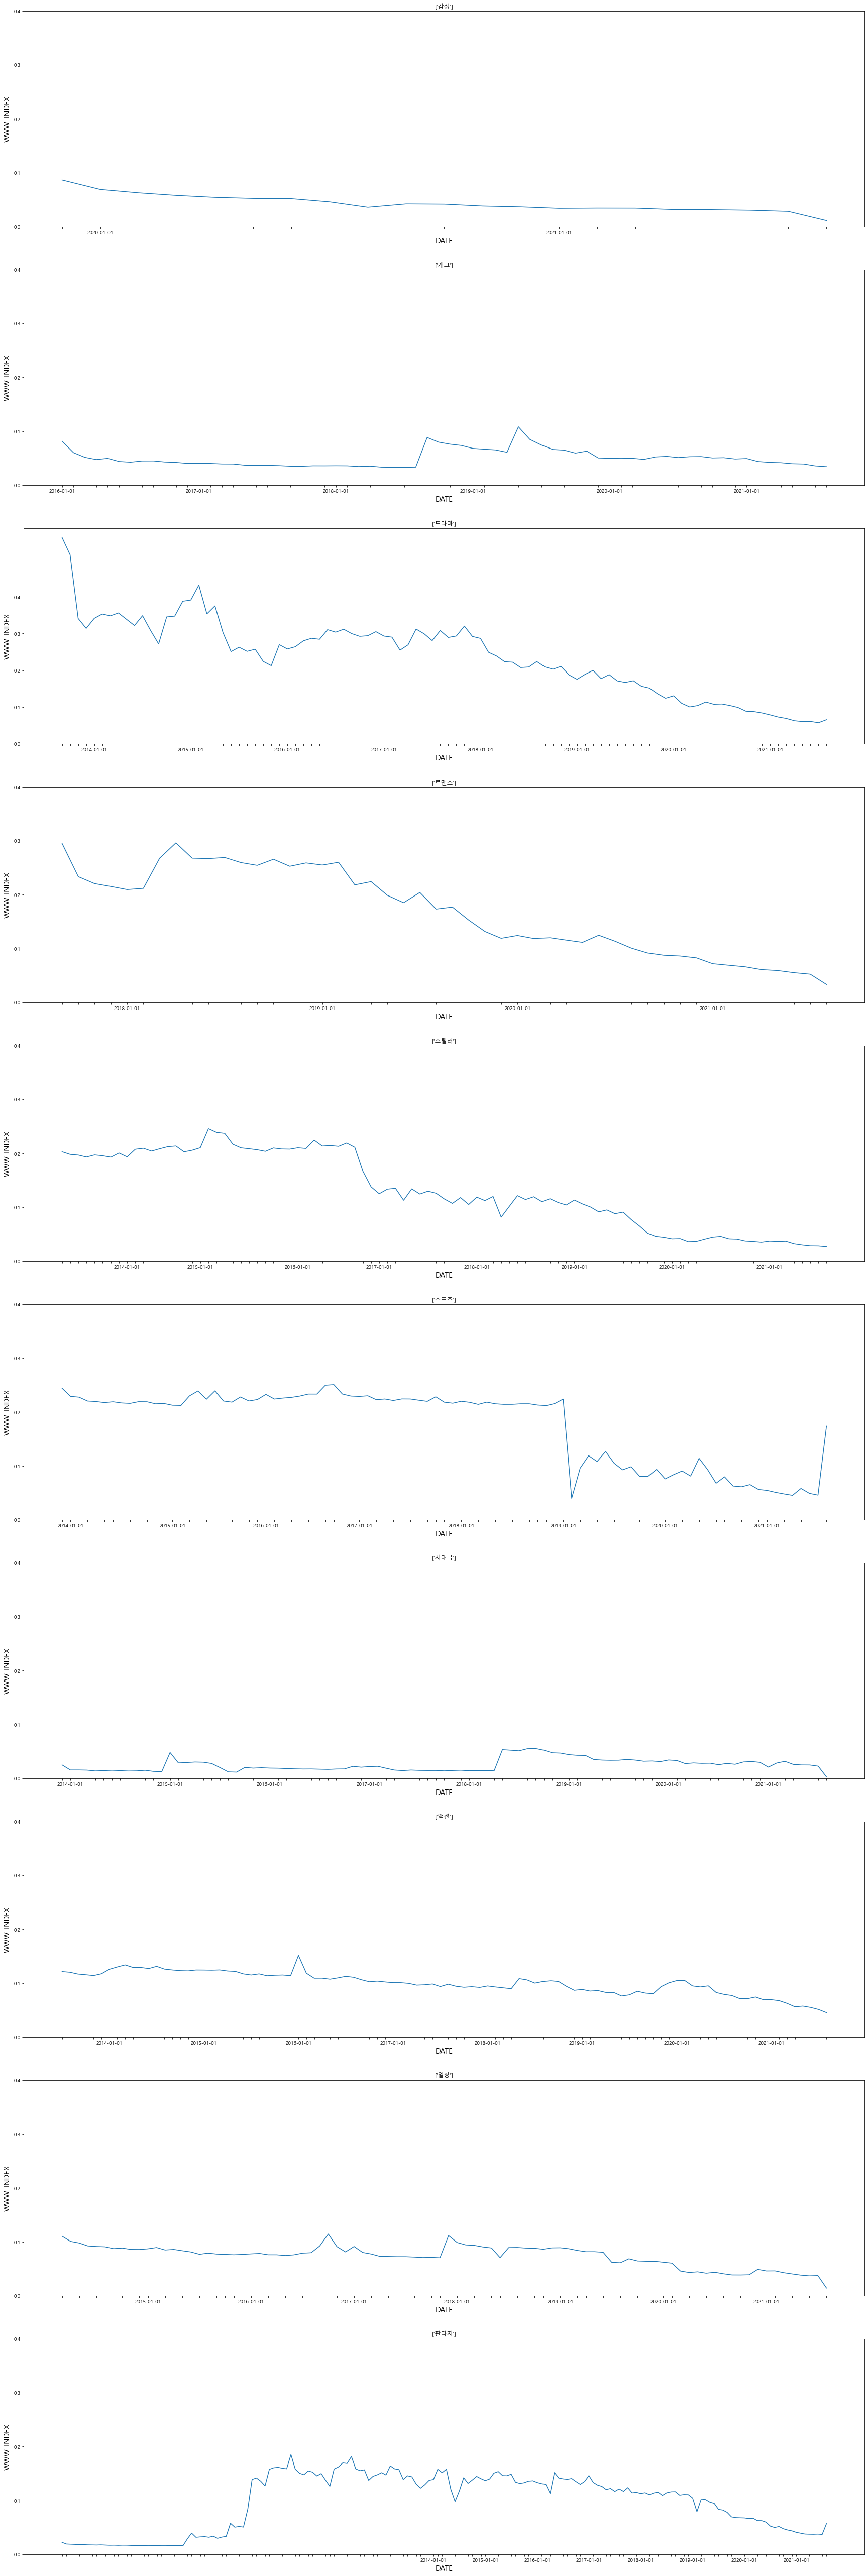

In [46]:
#장르별 추이 그래프
n=1
plt.figure(figsize=(30,150))

for i in tqdm(genre_list):
    
    #날짜리스트
    date_temp = genre_grape[genre_grape['genre'] == i]['date']    
    
    #연초만 저장
    date_list2 = []
    for j in range(0,len(date_temp)):
        if str(date_temp.values[j])[0:10] in ['2014-01-01','2015-01-01','2016-01-01','2017-01-01','2018-01-01','2019-01-01','2020-01-01','2021-01-01']:
            date_list2.append(str(date_temp.values[j])[0:10])
        else :
            date_list2.append("")
    date_list2
    
    like_wave = genre_grape[genre_grape['genre']==i ]['www']
    ax = plt.subplot(16,1,n)
    plt.plot(range(0,len(like_wave.values)), like_wave.values)
    plt.xticks(np.arange(0,len(date_temp)), labels=date_list2)
    plt.xlabel('DATE', size=15)
    plt.ylabel('WWW_INDEX', size=15)
    plt.yticks(np.arange(0,0.5,0.1))
    plt.title(i)
    n+=1
plt.show()